In [2]:
# Imports
from refinegems.classes.gapfill import BioCycGapFiller, GeneGapFiller, KEGGapFiller
from refinegems.curation.curate import extend_gp_annots_via_KEGG
from refinegems.utility.io import load_model, write_model_to_file
from refinegems.utility.set_up import download_url # For downloading the uniprot file for the GeneGapFiller

In [3]:
# Get model file loaded with COBRA (for missing reactions) & libSBML
model_file = '../data/iJN1463.xml'
model = load_model(model_file,'libsbml')
cmodel = load_model(model_file,'cobra')

INFO:cobra.core.model:The current solver interface glpk doesn't support setting the optimality tolerance.


## KEGGapFiller
The KEGGapFiller infers missing genes by querying the gene entries for the organism in question in the [Kyoto Encyclopedia of Genes and Genomes (KEGG) database](https://www.genome.jp/kegg/). From the so found missing genes the missing reactions and metabolites are determined and added to the model via the `fill_model` function.

**Requirements:**
- The modelled organism needs to have an entry in the KEGG database.
- The model needs to contain the locus_tag from NCBI Genbank in the label attribute of the GeneProduct entities.
- The model needs to be loaded as libSBML and COBRApy objects as all methods except `find_missing_reactions`, which requires a COBRApy model object, require a libSBML model object.


### Initialisation

In [4]:
# If the provided model has no KEGG Gene IDs in the annotations, these need to be added to run the KEGGapFiller.
# Add KEGG Gene IDs
extend_gp_annots_via_KEGG(model.getPlugin('fbc').getListOfGeneProducts(), 'ppu')

INFO:root:Trying to add KEGG Gene IDs and UniProt IDs to GeneProducts...


  0%|          | 0/1462 [00:00<?, ?it/s]

INFO:refinegems.curation.curate:The following 22 locus tags form no valid KEGG Gene ID: ['PP_0253', 'pWW0_094', 'pWW0_095', 'pWW0_093', 'pWW0_096', 'pWW0_091', 'pWW0_097', 'PP_2519', 'pWW0_099', 'pWW0_130', 'pWW0_090', 'pWW0_127', 'PP_3462', 'PP_s0001', 'pWW0_131', 'pWW0_092', 'pWW0_100', 'pWW0_101', 'pWW0_102', 'PP_3465', 'pWW0_129', 'pWW0_128'] with the provided KEGG Organism ID: ppu.


In [5]:
# Initialise GapFiller subclass to be used with required parameters
gfk = KEGGapFiller('ppu')

### Missing genes

In [6]:
# Find missing genes
gfk.find_missing_genes(model)

# Get/show missing genes
gfk.missing_genes

100%|██████████| 4346/4346 [1:29:26<00:00,  1.23s/it]


,orgid:locus,locus_tag,kegg.orthology,ec-code,ncbiprotein,uniprot
0,ppu:PP_0001,PP_0001,[K03497],None,AAN65635,[P0A151]
1,ppu:PP_0002,PP_0002,[K03496],None,AAN65636,[P0A149]
2,ppu:PP_0003,PP_0003,[K03501],[2.1.1.170],AAN65637,[P0A124]
3,ppu:PP_0004,PP_0004,[K03495],None,AAN65638,[Q88RW8]
4,ppu:PP_0005,PP_0005,[K03650],[3.6.-.-],AAN65639,[P0A175]
...,...,...,...,...,...,...
4341,ppu:PP_5405,PP_5405,NaN,None,AAN70969,[Q88BY2]
4342,ppu:PP_5406,PP_5406,NaN,None,AAN70970,[Q88BY1]
4343,ppu:PP_5407,PP_5407,NaN,None,AAN70971,[Q88BY0]
4344,ppu:PP_5408,PP_5408,NaN,None,AAN70972,[Q88BX9]


### Missing reactions

In [7]:
# Find missing reactions
gfk.find_missing_reactions(cmodel)

# Get/show missing reactions
gfk.missing_reactions

,ec-code,ncbiprotein,id,equation,reference,is_transport,via,add_to_GPR
0,1.1.1.22,[AAN68534],MNXR152122,2 MNXM10@MNXD1 + 1 MNXM1104890@MNXD1 + 3 MNXM1...,rheaR:23596,None,MetaNetX,None
1,1.1.1.346,[AAN69271],MNXR112370,1 MNXM1@MNXD1 + 1 MNXM738702@MNXD1 + 1 MNXM936...,rheaR:35111,None,MetaNetX,None
2,1.1.1.346,[AAN69271],MNXR132737,1 MNXM2177@MNXD1 + 1 MNXM738702@MNXD1 = 1 MNXM...,sabiorkR:5414,None,MetaNetX,None
3,1.1.1.381,[AAN66118],MNXR114166,1 MNXM1106@MNXD1 + 1 MNXM13@MNXD1 + 1 MNXM7387...,rheaR:43524,None,MetaNetX,None
4,1.1.1.381,[AAN66118],MNXR95851,1 MNXM1106@MNXD1 + 1 MNXM13@MNXD1 = 1 MNXM1140...,rheaR:25653,None,MetaNetX,None
...,...,...,...,...,...,...,...,...
405,7.2.2.9,[AAN69841],MNXR96950,1 MNXM1@MNXD1 + 1 MNXM40333@MNXD1 + 1 MNXM7311...,seedR:rxn05528,T,MetaNetX,None
406,7.4.2.8,"[AAN66672, AAN66968, AAN69084, AAN69944, AAN70...",MNXR115578,1 MNXM1@MNXD1 + 1 MNXM40333@MNXD1 + 1 MNXM7333...,metacycR:RXN-20761,T,MetaNetX,None
407,7.5.2.7,[AAN68367],MNXR165370,1 MNXM1@MNXD1 + 1 MNXM40333@MNXD1 + 1 MNXM7329...,metacycR:TRANS-RXN-332,T,MetaNetX,None
408,7.6.2.-,[AAN67768],MNXR183687,1 MNXM1101005@MNXD1 + 1 MNXM1@MNXD2 + 1 MNXM40...,seedR:rxn40820,T,MetaNetX,None


### Fill model

In [8]:
# Fill model
model = gfk.fill_model(model)

INFO:refinegems.utility.io:Modified model written to /var/folders/4d/pg0bn3t10qj3xq6d26jzx2y00000gr/T/tmpuyaa9qe7.xml
INFO:cobra.core.model:The current solver interface glpk doesn't support setting the optimality tolerance.
Trying to add missing reacs:   4%|▎         | 15/410 [00:03<00:43,  9.12it/s]/Users/doebel/miniconda3/envs/rgsp312/lib/python3.12/site-packages/cobra/core/metabolite.py:129: UserWarning: invalid character '*' found in formula 'C21H26N7O14P2*'
  warn(f"invalid character '*' found in formula '{self.formula}'")
/Users/doebel/miniconda3/envs/rgsp312/lib/python3.12/site-packages/cobra/core/metabolite.py:129: UserWarning: invalid character '*' found in formula 'C21H25N7O14P2*'
  warn(f"invalid character '*' found in formula '{self.formula}'")
Trying to add missing reacs:   6%|▋         | 26/410 [00:06<02:05,  3.05it/s]/Users/doebel/miniconda3/envs/rgsp312/lib/python3.12/site-packages/cobra/core/metabolite.py:129: UserWarning: invalid character '*' found in formula 'C6H2O2

In [9]:
write_model_to_file(model, '../data/iJN1463_filled.xml')

INFO:refinegems.utility.io:Modified model written to ../data/iJN1463_filled.xml


### Statistics

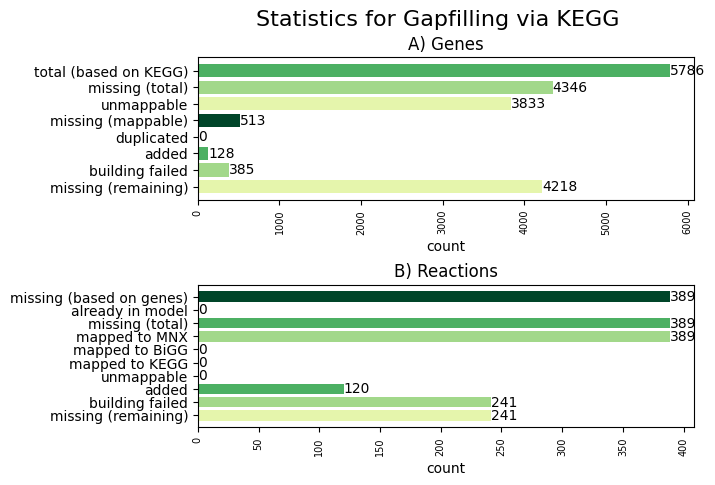

In [10]:
# Get raw statistics
gfk.report('../data/')

## GeneGapFiller
The GeneGapFiller infers missing genes by querying the gene entries for the organism in question in the GFF file. From the so found missing genes the missing reactions and metabolites are determined and added to the model via the `fill_model` function.

**Requirements:**
- For the modelled organism a GFF file needs to exist.
- A database to be queried needs to be provided. The user can download a SwissProt DIAMOND database including a mapping table from UniProt IDs to EC Numbers. Additionally, a user DIAMOND database with or without a mapping can be provided.
- The model needs to contain the locus tag from NCBI Genbank in the label attribute of the GeneProduct entities.
- The model needs to be loaded as libSBML and COBRApy objects as all methods except `find_missing_reactions`, which requires a COBRApy model object, require a libSBML model object.

### Initialisation
#### Get SwissProt DIAMOND database

In [ ]:
# The following part can be used to acquire the UniProt database for the GeneGapFiller.
# It is not necessary to run this part as a database file for the workshop is provided under `../data/Uniprot`.

# Get UniProt database
# download_url('SwissProt gapfill', directory='../data/swissprot_data/')

# On the command line:
# diamond makedb --in ./dev/test_files/test_gapfill/SwissProt.fasta -d ./dev/test_files/test_gapfill/swissprot

#### Initialise GeneGapFiller

In [ ]:
# Get files required for the GeneGapFiller
gffpath = '../data/GCA_000007565.2_ASM756v2_genomic.gff'

tfasta = '../data/GCA_000007565.2_ASM756v2_translated_cds.faa'
spdb = '../data/Uniprot/uniprot_subset.dmnd'
spmap = '../data/Uniprot/uniprot_subset.tsv'
kwargs = {'outdir':'../data/genegapfill_out/',
          'sens':'more-sensitive',
          'cov':95.0,
          't':4,
          'pid':90.0}

# Initialise GapFiller subclass to be used with required parameters
gfg = GeneGapFiller()

### Missing genes

In [ ]:
# Find missing genes
gfg.find_missing_genes(gffpath,model)

# Get/show missing genes
gfg.missing_genes


### Missing reactions

In [ ]:
# Find missing reactions
gfg.find_missing_reactions(model=cmodel,
                           type_db='swissprot',
                           fasta=tfasta,
                           dmnd_db=spdb,
                           map_db=spmap,
                           mail='gwendolyn-olivia.doebel@informatik.uni-halle.de',
                           check_NCBI=True,
                           **kwargs)

# Get/show missing reactions
gfg.missing_reactions

### Fill model

In [ ]:
# Fill model
model = gfg.fill_model(model,formula_check='existence')

In [ ]:
write_model_to_file(model, '../data/iJN1463_filled.xml')

### Statistics

In [ ]:
# Get raw statistics
gfg.report('../data/')

# BioCycGapFiller
The BioCycGapFiller infers missing genes by querying the gene entries for the organism in question in the [BioCyc database](https://biocyc.org/). From the so found missing genes the missing reactions and metabolites are determined and added to the model via the `fill_model` function.

**Requirements:**
- The modelled organism needs to have an entry in the BioCyc database.
- For the organism a gene to reaction mapping table and a reaction table containing the EC Numbers along with the specification if the reaction is spontaneous or not need to be created and downloaded from BioCyc. 
*Note:* For this workshop see `../data/biocyc/`.
- The model needs to contain the locus tag from NCBI Genbank in the label attribute of the GeneProduct entities.
- The model needs to be loaded as libSBML and COBRApy objects as all methods except `find_missing_reactions`, which requires a COBRApy model object, require a libSBML model object.

## Initialisation

In [ ]:
# Get files required for the BioCycGapFiller
gffpath = '../data/GCA_000007565.2_ASM756v2_genomic.gff'
biocyc_gene_tbl_path = '../data/biocyc/PputKT2440_Accession-22Reactions.tsv'
biocyc_reacs_tbl_path = '../data/biocyc/PputKT2440_biocyc_rxns.tsv'
fasta = '../data/GCA_000007565.2_ASM756v2_translated_cds.faa'

# Initialise GapFiller subclass to be used with required parameters
gfbc = BioCycGapFiller(biocyc_gene_tbl_path, biocyc_reacs_tbl_path, gffpath)

### Missing genes

In [ ]:
# Find missing genes
gfbc.find_missing_genes(model)

# Get/show missing genes
gfbc.missing_genes

### Missing reactions

In [ ]:
# Find missing reactions
gfbc.find_missing_reactions(cmodel)

# Get/show missing reactions
gfbc.missing_reactions

### Fill model

In [ ]:
# Fill model
filled_model = gfbc.fill_model(model)

In [ ]:
write_model_to_file(filled_model, '../data/iJN1463_filled.xml')

### Statistics

In [ ]:
# Get raw statistics
gfbc.report('../data/')